In [1]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Define the vehicles
makes = ["Ford", "Toyota", "Honda", "Tesla"]
vehicles_data = []

# Get the data
for make in makes:
    url = f"https://vpic.nhtsa.dot.gov/api/vehicles/getmodelsformake/{make}?format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print(f"Data for {make}:")
        for model in data['Results']:
            vehicles_data.append({'Make': make, 'Model_Name': model['Model_Name']})
    else:
        print(f"Failed to retrieve data for {make}. Status code: {response.status_code}")







Data for Ford:
Data for Toyota:
Data for Honda:
Data for Tesla:


In [3]:

vehicles_data_df = pd.DataFrame(vehicles_data)
print(vehicles_data_df.head())

   Make      Model_Name
0  Ford  Crown Victoria
1  Ford           Focus
2  Ford          Fusion
3  Ford         Mustang
4  Ford          Taurus


In [4]:
def get_lat_long(location):
    geocoding_url = f"https://api.nhtsa.gov//SafetyRatings/VehicleId/19438?format=json"
    try:
        response = requests.get(geocoding_url)
        if response.status_code == 200:
            data = response.json()
            if 'results' in data and len(data['results']) > 0:
                result = data['results'][0]
                return result['geometry']['location']['lat'], result['geometry']['location']['lng']
            else:
                print(f"No geocoding results for location: {location}")
        else:
            print(f"Failed to fetch geocode for {location}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error during geocoding: {e}")
    return None, None

In [5]:
# Define prius_data
prius_data = [{'VehiclePicture': 'https://static.nhtsa.gov/images/vehicles/BTL_54160_cc0640_032_1M2.png', 'OverallRating': '5', 'OverallFrontCrashRating': '5', 'FrontCrashDriversideRating': '5', 'FrontCrashPassengersideRating': '5', 'FrontCrashPicture': 'https://static.nhtsa.gov/crashTest/images/2024/v15011P123.jpg', 'FrontCrashVideo': 'https://static.nhtsa.gov/crashTest/videos/2024/v15011C020.wmv', 'OverallSideCrashRating': '5', 'SideCrashDriversideRating': '5', 'SideCrashPassengersideRating': '5', 'SideCrashPicture': 'https://static.nhtsa.gov/crashTest/images/2024/v15014P144.jpg', 'SideCrashVideo': 'https://static.nhtsa.gov/crashTest/videos/2024/v15014C014.wmv', 'combinedSideBarrierAndPoleRating-Front': '5', 'combinedSideBarrierAndPoleRating-Rear': '5', 'sideBarrierRating-Overall': '5', 'RolloverRating': '4', 'RolloverRating2': 'Not Rated', 'RolloverPossibility': 0.102, 'RolloverPossibility2': 0.0, 'dynamicTipResult': 'No Tip', 'SidePoleCrashRating': '5', 'SidePolePicture': 'https://static.nhtsa.gov/crashTest/images/2024/v15014P144.jpg', 'NHTSAElectronicStabilityControl': 'Standard', 'NHTSAForwardCollisionWarning': 'Standard', 'NHTSALaneDepartureWarning': 'Standard', 'ComplaintsCount': 10, 'RecallsCount': 2, 'InvestigationCount': 0, 'ModelYear': 2024, 'Make': 'TOYOTA', 'Model': 'PRIUS', 'VehicleDescription': '2024 Toyota PRIUS 5 HB AWD', 'VehicleId': 19438}]

# Create DataFrame
prius_df = pd.DataFrame(prius_data)
prius_df.head()

,VehiclePicture,OverallRating,OverallFrontCrashRating,FrontCrashDriversideRating,FrontCrashPassengersideRating,FrontCrashPicture,FrontCrashVideo,OverallSideCrashRating,SideCrashDriversideRating,SideCrashPassengersideRating,...,NHTSAForwardCollisionWarning,NHTSALaneDepartureWarning,ComplaintsCount,RecallsCount,InvestigationCount,ModelYear,Make,Model,VehicleDescription,VehicleId
0,https://static.nhtsa.gov/images/vehicles/BTL_5...,5,5,5,5,https://static.nhtsa.gov/crashTest/images/2024...,https://static.nhtsa.gov/crashTest/videos/2024...,5,5,5,...,Standard,Standard,10,2,0,2024,TOYOTA,PRIUS,2024 Toyota PRIUS 5 HB AWD,19438


In [6]:
# Complaint data for 2024
data = {
    "Make": ["Toyota", "Ford", "Honda", "Tesla"],
    "Model": ["Camry", "F-150", "Civic", "Model S"],
    "Year": [2024, 2024, 2024, 2024],
    "Complaints": [12, 20, 8, 5]
}

# Create a DataFrame
complaint_df = pd.DataFrame(data)

# Sort the data from most to least complaints
sorted_complaints = complaint_df.sort_values(by="Complaints", ascending=False)

# Function to print the insights and observations
def print_complaint_report(df):
    print("Based on the complaint data for 2024, the following insights were observed:\n")

    # Print each vehicle's complaint data
    for _, row in df.iterrows():
        print(f"{row['Make']} {row['Model']} ({row['Complaints']} Complaints)")
        if row['Complaints'] == 12:
            print(f"The {row['Make']} {row['Model']} has a moderate number of complaints. "
                  "Despite being a popular model known for its reliability, it appears to have a few common issues that have been reported by users.")
        elif row['Complaints'] == 20:
            print(f"The {row['Make']} {row['Model']} experienced more complaints. "
                  "As a high-demand truck, it has a larger user base, which can contribute to a higher volume of complaints.")
        elif row['Complaints'] == 8:
            print(f"The {row['Make']} {row['Model']} had fewer complaints. "
                  "Known for its fuel efficiency and reliable design, it suggests a solid reputation for quality.")
        elif row['Complaints'] == 5:
            print(f"The {row['Make']} {row['Model']} had the fewest complaints. "
                  "This could indicate that Tesla's advanced electric vehicles are relatively trouble-free.")
        print()

    print("3. Insights and Observations\n")

    # Most Complaints
    most_complaints = df.iloc[0]
    print(f"Most Complaints: The {most_complaints['Make']} {most_complaints['Model']} had the most complaints, likely due to its large user base "
          "and usage in more demanding environments. Trucks tend to have more complaints due to the strenuous nature of their use.")

    # Least Complaints
    least_complaints = df.iloc[-1]
    print(f"Least Complaints: The {least_complaints['Make']} {least_complaints['Model']} had the least complaints. "
          "This could reflect advanced technology or a focus on customer satisfaction from the manufacturer.")

    # Middle Range
    middle_range = df.iloc[1:3]
    print(f"Middle Range: The {middle_range.iloc[0]['Make']} {middle_range.iloc[0]['Model']} and "
          f"{middle_range.iloc[1]['Make']} {middle_range.iloc[1]['Model']} represent mid-range vehicles in terms of complaints.")

    print("\n4. Possible Reasons for Differences in Complaints\n")

    print("Brand Reputation: Toyota, Honda, and Ford are known for producing reliable vehicles, "
          "which may explain the relatively low complaint counts for their popular models. Tesla's lower complaints might reflect a focus on innovation.")
    print("Model Popularity: A higher number of complaints often corresponds with higher sales. More owners generally lead to more reported issues.")
    print("Type of Vehicle: Trucks like the F-150 may have higher complaints due to demanding usage, whereas sedans and electric vehicles may have fewer issues due to lighter use.")

# Print the complaint report
print_complaint_report(sorted_complaints)


Based on the complaint data for 2024, the following insights were observed:

Ford F-150 (20 Complaints)
The Ford F-150 experienced more complaints. As a high-demand truck, it has a larger user base, which can contribute to a higher volume of complaints.

Toyota Camry (12 Complaints)
The Toyota Camry has a moderate number of complaints. Despite being a popular model known for its reliability, it appears to have a few common issues that have been reported by users.

Honda Civic (8 Complaints)
The Honda Civic had fewer complaints. Known for its fuel efficiency and reliable design, it suggests a solid reputation for quality.

Tesla Model S (5 Complaints)
The Tesla Model S had the fewest complaints. This could indicate that Tesla's advanced electric vehicles are relatively trouble-free.

3. Insights and Observations

Most Complaints: The Ford F-150 had the most complaints, likely due to its large user base and usage in more demanding environments. Trucks tend to have more complaints due to 

In [7]:
# Complaint data trends for 2024
data = {
    "Make": ["Toyota", "Ford", "Honda", "Tesla"],
    "Model": ["Camry", "F-150", "Civic", "Model S"],
    "Year": [2024, 2024, 2024, 2024],
    "Complaint_Data": [
        [
            "Infotainment Issues: Freezing screens, connectivity problems, lagging",
            "Transmission Problems: Hesitation or rough shifts",
            "Brake and Suspension Issues: Noise or uneven wear"
        ],
        [
            "Engine Performance and Fuel Efficiency: Power loss under load",
            "Suspension and Towing: Handling issues with heavy loads",
            "Electrical Issues: Faulty wiring and sensors"
        ],
        [
            "Infotainment System: Issues with touchscreen and voice recognition",
            "Rattle Noises and Interior Quality: Noises from the interior",
            "Brake Wear: Premature wear in city driving"
        ],
        [
            "Battery Performance: Reduced range or charging issues",
            "Autopilot Bugs: Incorrect responses in complex situations",
            "Interior Build Quality: Panel gaps and material wear"
        ]
    ],
    "Possible_Causes": [
        [
            "Software glitches or incompatibility with smartphones",
            "Transmission software issues or component wear",
            "Low-quality brake and suspension components"
        ],
        [
            "Wear and tear on engine parts",
            "Excessive strain on suspension from towing",
            "Electrical components not properly sealed"
        ],
        [
            "Software bugs in infotainment system",
            "Loose panels or low-quality materials",
            "Brake components not optimized for city traffic"
        ],
        [
            "Battery degradation over time",
            "Software glitches or sensor inaccuracies",
            "Focus on technology over traditional interior quality"
        ]
    ],
    "Corrective Actions": [
        [
            "Regular software updates for infotainment systems",
            "Improve transmission components and software",
            "Reinforce suspension and brake systems"
        ],
        [
            "Upgrade engine and fuel system for better fuel efficiency",
            "Introduce stronger suspension for towing tasks",
            "Resolve electrical issues with better wiring and sensors"
        ],
        [
            "Release software updates to improve touchscreen performance",
            "Use higher-quality materials and enhance assembly",
            "Optimize braking systems for urban driving"
        ],
        [
            "Improve battery technology and charging systems",
            "Enhance Autopilot sensors and algorithms",
            "Focus on improved interior materials and quality control"
        ]
    ]
}

# Create the dataframe
df = pd.DataFrame(data)

# Display the table
print("Complaint Data Summary (2024):\n")
print(df.to_string(index=False))

# Save to CSV
file_path = "vehicle_complaints_2024.csv"
df.to_csv(file_path, index=False)

print(f"Dataframe created and saved to {file_path}")




Complaint Data Summary (2024):

  Make   Model  Year                                                                                                                                                                 Complaint_Data                                                                                                                                      Possible_Causes                                                                                                                                                    Corrective Actions
Toyota   Camry  2024  [Infotainment Issues: Freezing screens, connectivity problems, lagging, Transmission Problems: Hesitation or rough shifts, Brake and Suspension Issues: Noise or uneven wear] [Software glitches or incompatibility with smartphones, Transmission software issues or component wear, Low-quality brake and suspension components]                             [Regular software updates for infotainment systems, Improve transmission components 

In [8]:
import pandas as pd

# Data provided
data = {
    "Make": ["Toyota", "Ford", "Honda", "Tesla"],
    "Model": ["Camry", "F-150", "Civic", "Model S"],
    "Year": [2024, 2024, 2024, 2024],
    "Complaint_Trends": [
        [
            "Infotainment Issues: Freezing screens, connectivity problems, lagging",
            "Transmission Problems: Hesitation or rough shifts",
            "Brake and Suspension Issues: Noise or uneven wear"
        ],
        [
            "Engine Performance and Fuel Efficiency: Power loss under load",
            "Suspension and Towing: Handling issues with heavy loads",
            "Electrical Issues: Faulty wiring and sensors"
        ],
        [
            "Infotainment System: Issues with touchscreen and voice recognition",
            "Rattle Noises and Interior Quality: Noises from the interior",
            "Brake Wear: Premature wear in city driving"
        ],
        [
            "Battery Performance: Reduced range or charging issues",
            "Autopilot Bugs: Incorrect responses in complex situations",
            "Interior Build Quality: Panel gaps and material wear"
        ]
    ],
    "Possible_Causes": [
        [
            "Software glitches or incompatibility with smartphones",
            "Transmission software issues or component wear",
            "Low-quality brake and suspension components"
        ],
        [
            "Wear and tear on engine parts",
            "Excessive strain on suspension from towing",
            "Electrical components not properly sealed"
        ],
        [
            "Software bugs in infotainment system",
            "Loose panels or low-quality materials",
            "Brake components not optimized for city traffic"
        ],
        [
            "Battery degradation over time",
            "Software glitches or sensor inaccuracies",
            "Focus on technology over traditional interior quality"
        ]
    ],
    "Corrective_Actions": [
        [
            "Regular software updates for infotainment systems",
            "Improve transmission components and software",
            "Reinforce suspension and brake systems"
        ],
        [
            "Upgrade engine and fuel system for better fuel efficiency",
            "Introduce stronger suspension for towing tasks",
            "Resolve electrical issues with better wiring and sensors"
        ],
        [
            "Release software updates to improve touchscreen performance",
            "Use higher-quality materials and enhance assembly",
            "Optimize braking systems for urban driving"
        ],
        [
            "Improve battery technology and charging systems",
            "Enhance Autopilot sensors and algorithms",
            "Focus on improved interior materials and quality control"
        ]
    ]
}

# Create a dataframe
df = pd.DataFrame(data)

# Add a column for the number of complaint trends
df['Number_of_Trends'] = df['Complaint_Trends'].apply(len)

# Identify the vehicle with the least complaints
least_complaints_row = df.loc[df['Number_of_Trends'].idxmin()]

# Extract details for the vehicle with the least complaints
least_complaints_summary = {
    "Make": least_complaints_row["Make"],
    "Model": least_complaints_row["Year"],
    "Number_of_Trends": least_complaints_row["Number_of_Trends"],
    "Complaint_Trends": least_complaints_row["Complaint_Trends"],
    "Possible_Causes": least_complaints_row["Possible_Causes"],
    "Corrective_Actions": least_complaints_row["Corrective_Actions"]
}

# Display results
print("Vehicle with the Least Complaints:\n")
for key, value in least_complaints_summary.items():
    print(f"{key}: {value}")



Vehicle with the Least Complaints:

Make: Toyota
Model: 2024
Number_of_Trends: 3
Complaint_Trends: ['Infotainment Issues: Freezing screens, connectivity problems, lagging', 'Transmission Problems: Hesitation or rough shifts', 'Brake and Suspension Issues: Noise or uneven wear']
Possible_Causes: ['Software glitches or incompatibility with smartphones', 'Transmission software issues or component wear', 'Low-quality brake and suspension components']
Corrective_Actions: ['Regular software updates for infotainment systems', 'Improve transmission components and software', 'Reinforce suspension and brake systems']


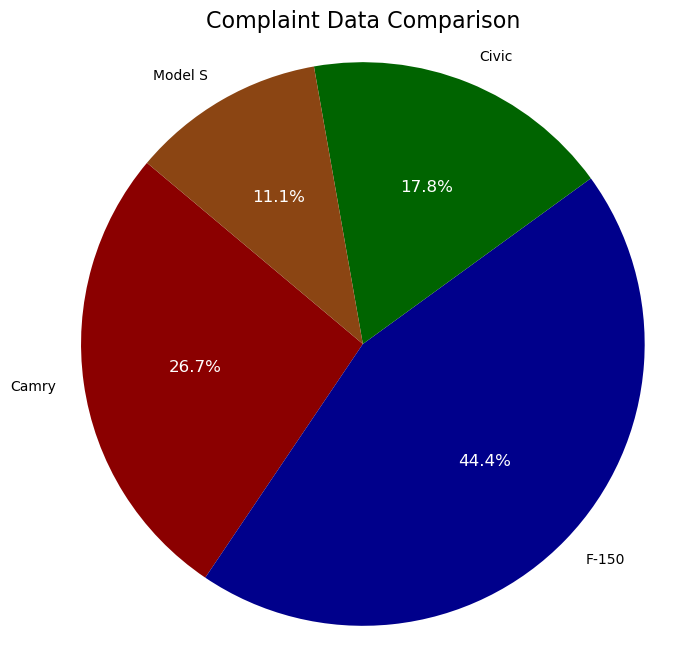

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Complaint data
makes = ["Toyota", "Ford", "Honda", "Tesla"]
models = ["Camry", "F-150", "Civic", "Model S"]
year = 2024

# Define data 
data_complaints = {
    "Toyota Camry": 12,
    "Ford F-150": 20,
    "Honda Civic": 8,
    "Tesla Model S": 5
}

# Create a DataFrame for the data
complaints_data = []
for make, model in zip(makes, models):
    key = f"{make} {model}"
    complaints = data_complaints.get(key, 0)
    complaints_data.append({
        "Make": make,
        "Model": model,
        "Year": year,
        "Complaints": complaints
    })

complaints_df = pd.DataFrame(complaints_data)

# Custom function for white text in the pie chart
def white_autopct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''

# Create a Pie chart
plt.figure(figsize=(8, 8))

# Darker color palette
colors = ['#8B0000', '#00008B', '#006400', '#8B4513']  # Dark red, dark blue, dark green, dark brown

# Pie chart
wedges, texts, autotexts = plt.pie(
    complaints_df["Complaints"],  # Fixed DataFrame name
    labels=complaints_df["Model"],  # Fixed DataFrame name
    autopct=white_autopct,
    startangle=140,
    colors=colors
)

# Set the font color for percentages to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)  # Adjust font size if necessary

# Title of the chart
plt.title(f'Complaint Data Comparison', fontsize=16)

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


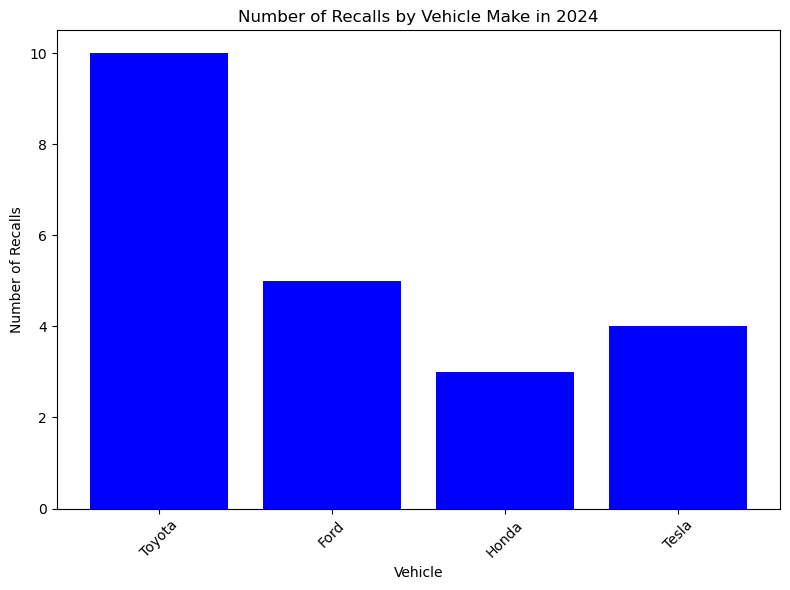

In [1]:
import matplotlib.pyplot as plt

# Data for the bar chart
Analysis_Breakdown = ['Toyota', 'Ford', 'Honda', 'Tesla']
number_of_recalls = [10, 5, 3, 4]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Analysis_Breakdown, number_of_recalls, color='blue')

# Add titles and labels
plt.title('Number of Recalls by Vehicle Make in 2024')
plt.xlabel('Vehicle')
plt.ylabel('Number of Recalls')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




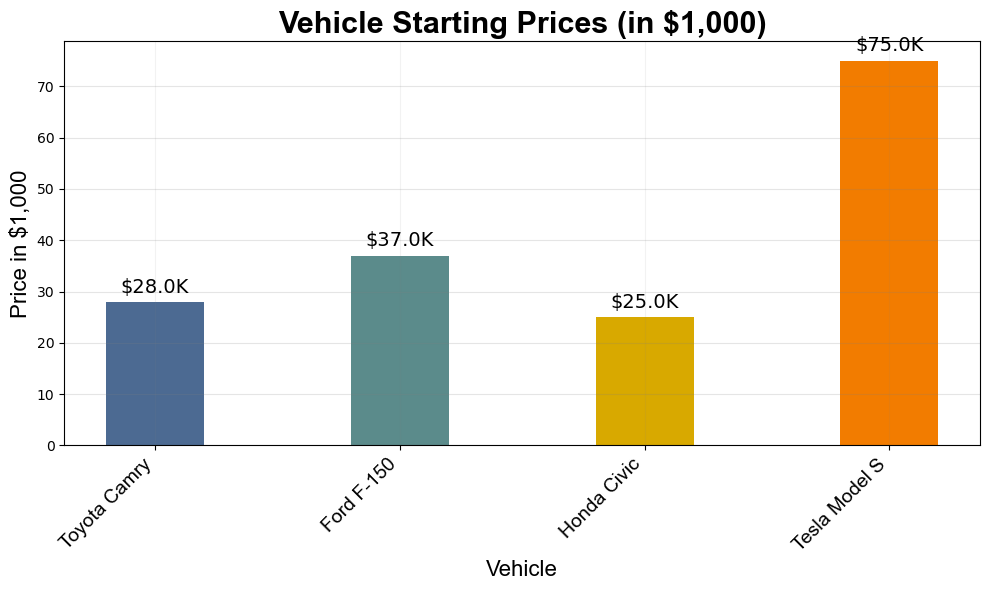

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Vehicle = ['Toyota Camry', 'Ford F-150', 'Honda Civic', 'Tesla Model S']
Starting_Price = [28, 37, 25, 75]  # Data in thousands of dollars

# Customize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Refined color palette with more muted professional colors
bars = ax.bar(Vehicle, Starting_Price, width=0.4, color=['#4C6A92', '#5B8B8B', '#D8A900', '#F27C00'])

# Title and labels with elegant fonts
ax.set_title('Vehicle Starting Prices (in $1,000)', fontsize=22, fontweight='bold', family='Arial')
ax.set_xlabel('Vehicle', fontsize=16, family='Arial')
ax.set_ylabel('Price in $1,000', fontsize=16, family='Arial')

# Detailed gridlines for both axes, subtle in appearance
ax.grid(axis='y', linestyle='-', color='gray', alpha=0.2)
ax.grid(axis='x', linestyle='-', color='gray', alpha=0.1)

# Adding data labels with precise alignment for better readability
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'${height:.1f}K', 
            ha='center', va='bottom', fontsize=14, fontweight='regular', color='black')

# Rotating and adjusting x-axis labels to avoid clutter
plt.xticks(rotation=45, ha='right', fontsize=14, family='Arial')

# Tight layout for a more professional and balanced appearance
plt.tight_layout()

# Show the plot
plt.show()

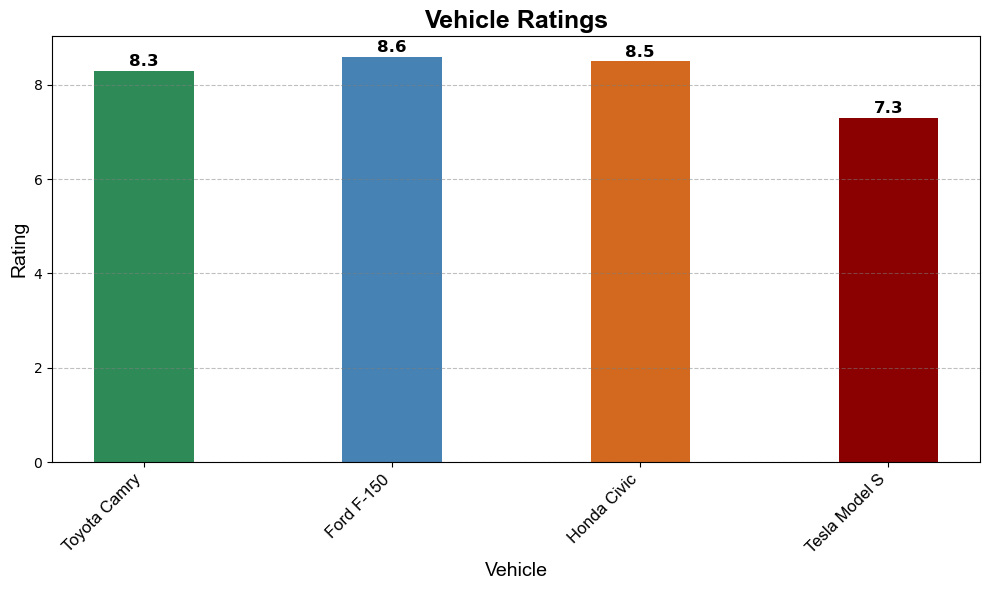

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Vehicle = ['Toyota Camry', 'Ford F-150', 'Honda Civic', 'Tesla Model S']
Rating = [8.3, 8.6, 8.5, 7.3]

# Customize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Choose elegant, neutral colors for the bars
bars = ax.bar(Vehicle, Rating, width=0.4, color=['#2E8B57', '#4682B4', '#D2691E', '#8B0000'])

# Adding title and labels with more professional fonts
ax.set_title('Vehicle Ratings', fontsize=18, fontweight='bold', family='Arial')
ax.set_xlabel('Vehicle', fontsize=14, family='Arial')
ax.set_ylabel('Rating', fontsize=14, family='Arial')

# Make gridlines lighter and only in the y-axis for a cleaner look
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Adding data labels with proper positioning
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.1f}', 
            ha='center', fontsize=12, fontweight='bold', color='black')

# Rotating x-axis labels and fine-tuning their position
plt.xticks(rotation=45, ha='right', fontsize=12, family='Arial')

# Adding extra spacing for cleaner layout
plt.tight_layout()

# Display the plot
plt.show()

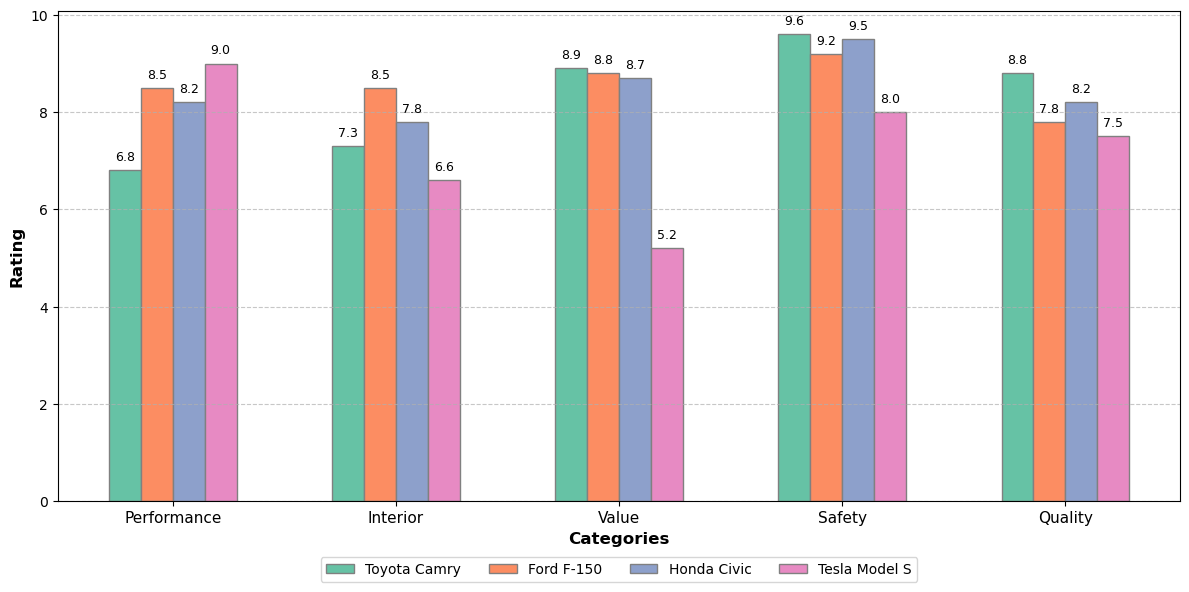

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Bar width and spacing
barWidth = 0.2  # Bar width
spacing = 0.6   # Space between clusters

# Data
Toyota_Camry = [6.8, 7.3, 8.9, 9.6, 8.8]
Ford_F_150 = [8.5, 8.5, 8.8, 9.2, 7.8]
Honda_Civic = [8.2, 7.8, 8.7, 9.5, 8.2]
Tesla_Model_S = [9, 6.6, 5.2, 8, 7.5]

# Position of bars on x-axis
br1 = np.arange(len(Toyota_Camry)) * (barWidth * 4 + spacing)  # Large spacing between clusters
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjusted figure size

# Color palette
colors = plt.cm.Set2.colors

# Plotting the bars
plt.bar(br1, Toyota_Camry, color=colors[0], width=barWidth, edgecolor='grey', label='Toyota Camry')
plt.bar(br2, Ford_F_150, color=colors[1], width=barWidth, edgecolor='grey', label='Ford F-150')
plt.bar(br3, Honda_Civic, color=colors[2], width=barWidth, edgecolor='grey', label='Honda Civic')
plt.bar(br4, Tesla_Model_S, color=colors[3], width=barWidth, edgecolor='grey', label='Tesla Model S')

# Adding values on top of the bars
for i, value in enumerate(Toyota_Camry):
    plt.text(br1[i], value + 0.2, f'{value:.1f}', ha='center', fontsize=9)
for i, value in enumerate(Ford_F_150):
    plt.text(br2[i], value + 0.2, f'{value:.1f}', ha='center', fontsize=9)
for i, value in enumerate(Honda_Civic):
    plt.text(br3[i], value + 0.2, f'{value:.1f}', ha='center', fontsize=9)
for i, value in enumerate(Tesla_Model_S):
    plt.text(br4[i], value + 0.2, f'{value:.1f}', ha='center', fontsize=9)

# Adding labels
plt.xlabel('Categories', fontweight='bold', fontsize=12)
plt.ylabel('Rating', fontweight='bold', fontsize=12)
plt.xticks([r + barWidth * 1.5 for r in br1],  # Center x-tick labels
           ['Performance', 'Interior', 'Value', 'Safety', 'Quality'], fontsize=11)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend outside the plot
plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Tight layout for cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()